In [5]:
from IPython import display 
import torch
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [11]:
print(features[0], labels[0])
print(features.size())
print(features.shape)
for f in features[:,0]:
    print(f)

tensor([-0.6562,  1.2506]) tensor(-1.3697)
torch.Size([1000, 2])
torch.Size([1000, 2])
tensor(-0.6562)
tensor(-0.3483)
tensor(-0.4187)
tensor(2.4750)
tensor(-1.4480)
tensor(1.6940)
tensor(1.2610)
tensor(-1.7892)
tensor(0.2302)
tensor(0.0305)
tensor(0.7374)
tensor(-0.3377)
tensor(-0.8448)
tensor(1.7223)
tensor(-1.5743)
tensor(-1.1775)
tensor(1.2812)
tensor(-0.0364)
tensor(-0.0959)
tensor(0.4103)
tensor(-1.4804)
tensor(-1.2458)
tensor(-1.0439)
tensor(-1.4719)
tensor(-0.4372)
tensor(-0.6114)
tensor(1.5143)
tensor(0.2666)
tensor(-2.6225)
tensor(0.3650)
tensor(-1.9754)
tensor(-1.1646)
tensor(-0.1812)
tensor(0.4235)
tensor(0.4998)
tensor(1.0608)
tensor(0.6161)
tensor(0.4497)
tensor(0.9024)
tensor(0.2069)
tensor(-0.8867)
tensor(-0.2395)
tensor(0.2864)
tensor(-1.3564)
tensor(-2.5998)
tensor(0.3594)
tensor(-0.7410)
tensor(-0.4595)
tensor(0.2488)
tensor(-0.0922)
tensor(0.6144)
tensor(0.1759)
tensor(-0.1414)
tensor(1.0481)
tensor(0.5672)
tensor(1.9542)
tensor(1.8751)
tensor(-0.3903)
tensor(-0.849

tensor(-0.4977)
tensor(0.6247)
tensor(-1.7579)
tensor(1.6290)
tensor(-1.4485)
tensor(-2.1013)
tensor(0.3367)
tensor(1.3146)
tensor(-0.9469)
tensor(1.5583)
tensor(1.5830)
tensor(0.7129)
tensor(-0.9628)
tensor(-0.4661)
tensor(0.5734)
tensor(-0.6146)
tensor(0.4852)
tensor(0.9894)
tensor(1.2230)
tensor(1.2020)
tensor(-1.1022)
tensor(1.1784)
tensor(0.1687)
tensor(0.1774)
tensor(-0.5659)
tensor(1.7370)
tensor(0.7947)
tensor(-0.3264)
tensor(0.7582)
tensor(-1.1810)
tensor(1.9722)
tensor(0.3448)
tensor(0.1806)
tensor(-1.1174)
tensor(0.9453)
tensor(0.5950)
tensor(-0.7700)
tensor(-0.4579)
tensor(-1.2439)
tensor(0.1071)
tensor(0.1927)
tensor(-0.6204)
tensor(0.9743)
tensor(0.4517)
tensor(1.3326)
tensor(-0.5629)
tensor(-0.9737)
tensor(-0.5968)
tensor(-0.1422)
tensor(-0.1854)
tensor(-1.6380)
tensor(0.3635)
tensor(1.3343)
tensor(-0.9867)
tensor(-0.3320)
tensor(1.0427)
tensor(0.2080)
tensor(1.6715)
tensor(-0.1107)
tensor(-0.1248)
tensor(-1.1237)
tensor(0.1373)
tensor(0.0951)
tensor(0.2563)
tensor(-2.10

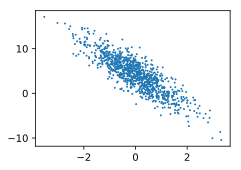

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [22]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        #print(j)# 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
        #index_select 沿着dim取index

In [20]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    #print(X, y)
    break

tensor([272, 325, 616, 375, 931, 733, 317, 197, 987, 111])


In [14]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [15]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [16]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [17]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [18]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [24]:
lr = 0.001

num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(linreg(X, w, b), y).sum()
        
        l.backward()
        
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000054
epoch 2, loss 0.000054
epoch 3, loss 0.000054
epoch 4, loss 0.000054
epoch 5, loss 0.000054
epoch 6, loss 0.000054
epoch 7, loss 0.000054
epoch 8, loss 0.000054
epoch 9, loss 0.000054
epoch 10, loss 0.000054


In [25]:
print(w)
print(b)

tensor([[ 2.0002],
        [-3.4000]], requires_grad=True)
tensor([4.2000], requires_grad=True)
